In [305]:
import pandas as pd
import tensorflow as tf
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [306]:
import seaborn as sns
data_train = pd.read_csv("/Users/Zhangmingshuai/Desktop/KaggleFile/all/train.csv")
#data_train.drop(['Name','Sex','Ticket','Age','Embarked','Fare','Cabin'],axis=1,inplace=True)
data_train
#colormap = plt.cm.viridis
#plt.figure(figsize=(7,6))
#plt.title('Pearson Correlation of Features', y=1.05, size=15)
#sns.heatmap(data_train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


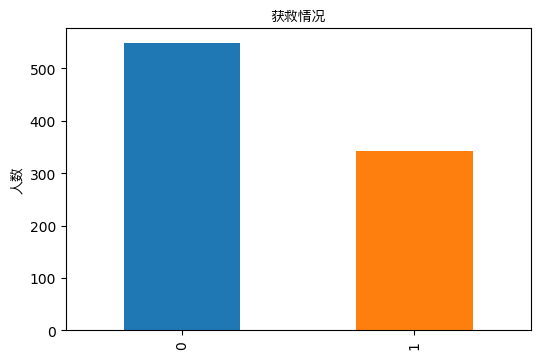

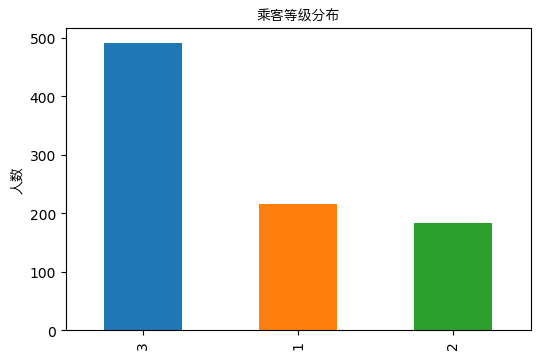

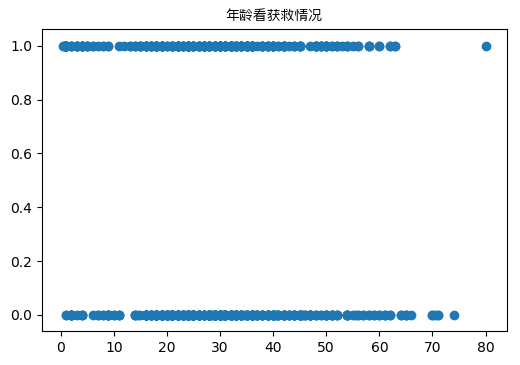

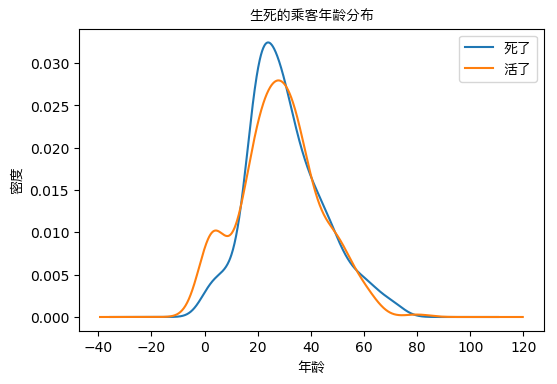

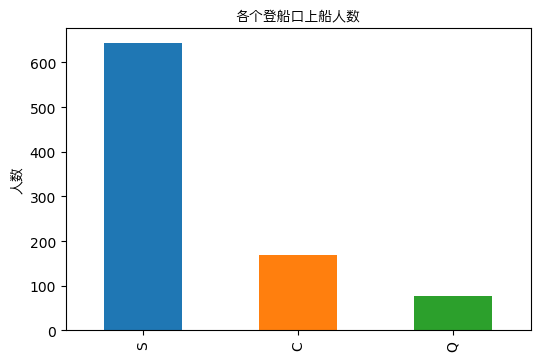

In [307]:
from matplotlib.font_manager import FontProperties
import matplotlib
myfont =matplotlib.font_manager.FontProperties(fname='/System/Library/Fonts/PingFang.ttc')  #微软雅黑字体
plt.rcParams['figure.dpi'] = 100 #分辨率
fig = plt.figure()


#plt.subplot2grid((2,3),(0,0))
data_train.Survived.value_counts().plot(kind='bar')
plt.title(u"获救情况", fontproperties = myfont)
plt.ylabel(u"人数", fontproperties = myfont)
plt.show()

fig = plt.figure()
#plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind='bar')
plt.ylabel(u"人数", fontproperties = myfont)
plt.title(u"乘客等级分布", fontproperties = myfont)
plt.show()

fig = plt.figure()
#plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Age,data_train.Survived)
plt.title(u"年龄看获救情况", fontproperties = myfont)
plt.show()

fig = plt.figure()
#plt.subplot2grid((2,3),(1,0),colspan=2)
data_train.Age[data_train.Survived == 0].plot(kind='kde', label=u"死了")
data_train.Age[data_train.Survived == 1].plot(kind='kde', label=u"活了")
#data_train.Age[data_train.Pclass == 3].plot(kind='kde', label=u"三等舱")
plt.xlabel(u"年龄", fontproperties = myfont)
plt.ylabel(u"密度", fontproperties = myfont)
plt.title(u"生死的乘客年龄分布", fontproperties = myfont)
plt.legend(loc='upper right',prop=myfont)
plt.show()


fig = plt.figure()
#plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各个登船口上船人数", fontproperties = myfont)
plt.ylabel(u"人数", fontproperties = myfont)

plt.show()

   female  male
0      81   468
1     233   109


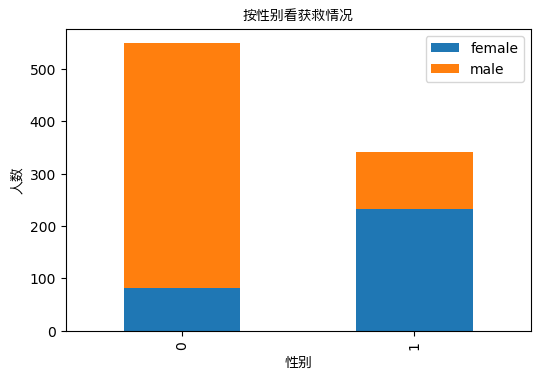

In [93]:
fig = plt.figure()
myfont =matplotlib.font_manager.FontProperties(fname='/System/Library/Fonts/PingFang.ttc')  #微软雅黑字体
plt.rcParams['figure.dpi'] = 100 #分辨率 
Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({"male":Survived_m, "female":Survived_f},)
print(df)
df.plot(kind='bar', stacked=True)
plt.title(u"按性别看获救情况",fontproperties = myfont)
plt.xlabel(u"性别",fontproperties = myfont) 
plt.ylabel(u"人数",fontproperties = myfont)
plt.show()

In [277]:
from sklearn.ensemble import RandomForestRegressor
 
### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):
 
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
 
    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
#    print(known_age[0:10,:])
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
#    print(unknown_age)
    # y即目标年龄
    y = known_age[:, 0]
 
    # X即特征属性值
    X = known_age[:, 1:]
 
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
 
    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1:])
 
    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
 
    return df, rfr
 
def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df
 
data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)
#data_train

In [278]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix = 'Cabin')
dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix = 'Embarked')
dummies_Sex = pd.get_dummies(data_train['Sex'], prefix = 'Sex')
dummies_Pclass = pd.get_dummies(data_train['Pclass'],prefix = 'Pclass')

data_train['Mother'] = -1
for k in data_train['Name'].values:
    if ('Mrs.' in k):
        data_train.loc[(data_train.Name == k)&(data_train.Parch > 1),'Mother'] = 1


dummies_Mother = pd.get_dummies(data_train['Mother'],prefix='Mother')

df = pd.concat([data_train,dummies_Cabin,dummies_Embarked,dummies_Pclass,dummies_Sex,dummies_Mother],axis = 1)
df.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)
#df

In [279]:
df.loc[((df.Age>=0.0) & (df.Age<=16.0)),'Age'] = 0
df.loc[((df.Age> 16.0) & (df.Age<=50.0)),'Age'] = 1
df.loc[(df.Age> 50.0),'Age'] = 2

dummies_age = pd.get_dummies(df['Age'],prefix='Age')
df = pd.concat([df,dummies_age],axis=1)
#df

In [119]:

print(df.shape)
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'].reshape(-1,1))
df['Age_scaled'] = scaler.fit_transform(df['Age'].reshape(-1,1))
fare_scale_param = scaler.fit(df['Fare'].reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].reshape(-1,1))
df


"\nprint(df.shape)\nimport sklearn.preprocessing as preprocessing\nscaler = preprocessing.StandardScaler()\nage_scale_param = scaler.fit(df['Age'].reshape(-1,1))\ndf['Age_scaled'] = scaler.fit_transform(df['Age'].reshape(-1,1))\nfare_scale_param = scaler.fit(df['Fare'].reshape(-1,1))\ndf['Fare_scaled'] = scaler.fit_transform(df['Fare'].reshape(-1,1))\ndf\n"

In [ ]:
from sklearn import linear_model

train_df = df.filter(regex='Survived|Age_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

y = train_np[:,0]
x = train_np[:,1:]

clf = linear_model.LogisticRegression(C=1.0,penalty='l1',tol=1e-6)
clf.fit(x,y)

clf

In [280]:
data_test = pd.read_csv("/Users/Zhangmingshuai/Desktop/KaggleFile/all/test.csv")
data_test.loc[(data_test.Fare.isnull()), 'Fare'] = 0
tmp_df = data_test[['Age','Fare','Parch','SibSp','Pclass']]
null_age = tmp_df[data_test.Age.isnull()].as_matrix()
X = null_age[:,1:]
predictedAges = rfr.predict(X)
data_test.loc[(data_test.Age.isnull()),'Age'] = predictedAges

data_test = set_Cabin_type(data_test)

dummies_Cabin = pd.get_dummies(data_test['Cabin'],prefix='Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'],prefix='Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'],prefix='Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'],prefix='Pclass')

data_test['Mother'] = -1
for k in data_test['Name'].values:
    if ('Mrs.' in k):
        data_test.loc[(data_test.Name == k)&(data_test.Parch > 1),'Mother'] = 1

dummies_Mother = pd.get_dummies(data_test['Mother'],prefix='Mother')

df_test = pd.concat([data_test,dummies_Cabin,dummies_Embarked,dummies_Pclass,dummies_Sex,dummies_Mother],axis=1)
df_test.drop(['Pclass','Name','Sex','Ticket','Cabin','Embarked'],axis=1,inplace=True)
df_test.loc[((df_test.Age>=0.0) & (df_test.Age<=16.0)),'Age'] = 0
df_test.loc[((df_test.Age> 16.0) & (df_test.Age<=50.0)),'Age'] = 1
df_test.loc[(df_test.Age> 50.0),'Age'] = 2

dummies_age = pd.get_dummies(df_test['Age'],prefix='Age')
df_test = pd.concat([df_test,dummies_age],axis=1)
#df_test

In [ ]:
import numpy as np
test = df_test.filter(regex='Age_.*|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(),'Survived':predictions.astype(np.int32)})
result.to_csv("/Users/Zhangmingshuai/Desktop/KaggleFile/all/logistic_regression_predictions.csv",index=False)

In [ ]:
pd.DataFrame({"columns":list(train_df.columns)[1:],"coef":list(clf.coef_.T)})


In [ ]:
from sklearn import cross_validation
 
 #简单看看打分情况
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.as_matrix()[:,1:]
y = all_data.as_matrix()[:,0]
print (cross_validation.cross_val_score(clf, X, y, cv=5))

In [ ]:
# 分割数据，按照 训练数据:cv数据 = 7:3的比例
split_train, split_cv = cross_validation.train_test_split(df, test_size=0.3, random_state=0)
train_df = split_train.filter(regex='Survived|Age_.*|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
# 生成模型
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_df.as_matrix()[:,1:], train_df.as_matrix()[:,0])
 
# 对cross validation数据进行预测
 
cv_df = split_cv.filter(regex='Survived|Age_.*|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.as_matrix()[:,1:])
 
origin_data_train = pd.read_csv("/Users/Zhangmingshuai/Desktop/KaggleFile/all/train.csv")
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.as_matrix()[:,0]]['PassengerId'].values)]
bad_cases

In [281]:
from sklearn.ensemble import BaggingRegressor
#from sklearn import cross_validation
#clf = linear_model.LogisticRegression(C=1.0,penalty='l1',tol=1e-6)
#all_data = df.filter(regex='Survived|Age_.*|Mother_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
#X = all_data.as_matrix()[:,1:]
#y = all_data.as_matrix()[:,0]
#print (cross_validation.cross_val_score(clf, X, y, cv=5))
train_df = df.filter(regex='Survived|Age_.*|Mother_.*|SibSp|Parch|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*')
train_np = train_df.as_matrix()

Y = train_np[:,0]
X = train_np[:,1:]

clf = linear_model.LogisticRegression(C=1.0,penalty='l1',tol=1e-6)
bagging_clf = BaggingRegressor(clf,n_estimators=20,max_samples=0.8,max_features=1.0,bootstrap=True,bootstrap_features=False,n_jobs=-1)
bagging_clf.fit(X,Y)

test = df_test.filter(regex='Age_.*|Cabin_.*|Mother_.*|SibSp|Parch|Embarked_.*|Sex_.*|Pclass.*')
predictions = bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(),'Survived':predictions.astype(np.int32)})
result.to_csv("/Users/Zhangmingshuai/Desktop/KaggleFile/all/logistic_regression_Bagging_SP_predictions.csv",index=False)